In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from tqdm import tqdm
import math, operator, warnings
import matplotlib.pyplot as plt 
from prettytable import PrettyTable

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
#Reading the dataset and then removing last two columns and storing it in df_without_last_two after that storing the last two columns in last_two_columns
df = pd.read_csv('/content/drive/MyDrive/IR_Dataset/Assignment_3/IR_A3')
df_without_last_two = df.iloc[:, :-2]
last_two_columns = df.iloc[:, -2:]
df.head(10)

,6,2,4,1289241911.72836
0,6,5,2,1.289242e+09
1,1,15,1,1.289243e+09
2,4,3,7,1.289245e+09
3,13,16,8,1.289254e+09
4,13,10,8,1.289254e+09
5,7,5,1,1.289363e+09
6,2,21,5,1.289371e+09
7,2,20,5,1.289371e+09
8,21,2,5,1.289381e+09
9,21,1,8,1.289441e+09


In [25]:
df_without_last_two.head()

,6,2
0,6,5
1,1,15
2,4,3
3,13,16
4,13,10


In [26]:
last_two_columns.head()

,4,1289241911.72836
0,2,1.289242e+09
1,1,1.289243e+09
2,7,1.289245e+09
3,8,1.289254e+09
4,8,1.289254e+09


In [27]:
#Storing the df_without_last_two to file1.csv
df_without_last_two.to_csv('/content/drive/MyDrive/IR_Dataset/Assignment_3/file1.csv', index=False)

In [28]:
import networkx as nx
#Reading the graph from the file
graph = nx.DiGraph()
with open('/content/drive/MyDrive/IR_Dataset/Assignment_3/file1.csv', 'r') as file:
    for line in file:
        x, y = map(int, line.strip().split(','))
        graph.add_edge(x, y)

In [29]:
#Calculating pagerank:
#The alpha parameter represents the damping factor, and the max_iter parameter represents the number of iterations.
pagerank = nx.pagerank(graph, alpha=0.85, max_iter=10)

In [30]:
#Calculate the HITS Score:
# The hits() method returns two dictionaries, one for authority scores and one for hub scores.
hits = nx.hits(graph, max_iter=10)
authority = hits[0]
hub = hits[1]

In [38]:
#Printing the Result:
print('Scores:')
for node in graph.nodes():
    print(f'Node {node}: PageRank={pagerank[node]:.20f}, Authority={abs(authority[node]):.20f}, Hub={abs(hub[node]):.20f}')

Streaming output truncated to the last 5000 lines.
Node 933: PageRank=0.00006018387966132733, Authority=0.00000407295063303685, Hub=0.00000345402340448807
Node 934: PageRank=0.00010496914587345698, Authority=0.00001903124705261425, Hub=0.00001177398804092674
Node 936: PageRank=0.00005649275403967884, Authority=0.00000000000000000000, Hub=0.00000090016955553122
Node 937: PageRank=0.00135450716327228352, Authority=0.00108217344400178637, Hub=0.00095627775223894502
Node 885: PageRank=0.00024653702153369108, Authority=0.00000216975154939879, Hub=0.00000253747672139145
Node 938: PageRank=0.00007572284522665646, Authority=0.00000991092469873201, Hub=0.00002202149011577004
Node 923: PageRank=0.00099714206144218653, Authority=0.00042614666857333794, Hub=0.00041208764784588582
Node 939: PageRank=0.00009824888954242443, Authority=0.00000828263319303573, Hub=0.00000597169176517454
Node 940: PageRank=0.00008639883999010123, Authority=0.00000292667141208312, Hub=0.00000654075162318335
Node 942: Pag

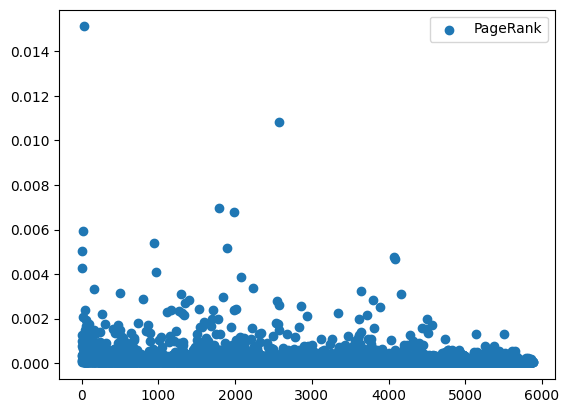

In [32]:
import matplotlib.pyplot as plt

# plot PageRank scores
pr_scores = list(pagerank.values())
plt.scatter(range(len(pr_scores)), pr_scores, label='PageRank')

plt.legend()
plt.show()


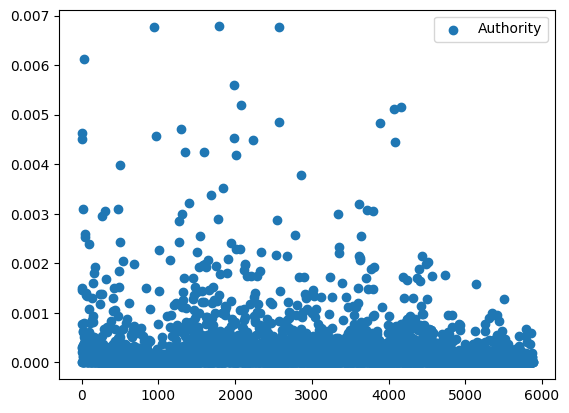

In [33]:
# plot Authority scores
auth_scores = list(authority.values())
plt.scatter(range(len(auth_scores)), auth_scores, label='Authority')

plt.legend()
plt.show()

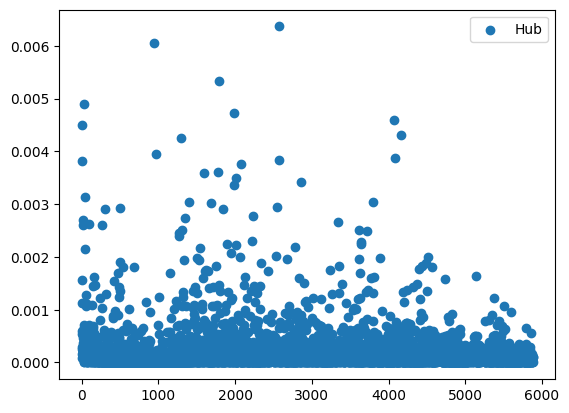

In [34]:
# plot Hub scores
hub_scores = list(hub.values())
plt.scatter(range(len(hub_scores)), hub_scores, label='Hub')

plt.legend()
plt.show()

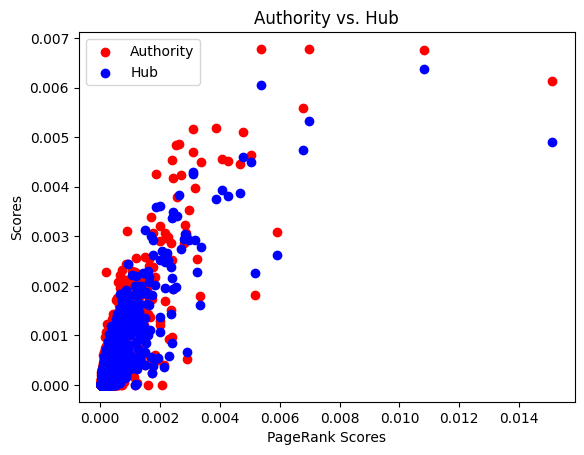

In [45]:
import matplotlib.pyplot as plt

# Plot Authority scores vs. Hub
plt.scatter(pagerank.values(), authority.values(), c='red', label='Authority')
plt.scatter(pagerank.values(), hub.values(), c='blue', label='Hub')
plt.xlabel('PageRank Scores')
plt.ylabel('Scores')
plt.title('Authority vs. Hub')
plt.legend()

plt.show()


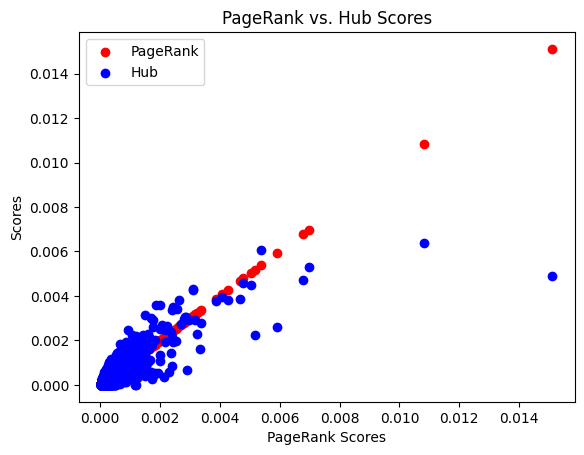

In [43]:
import matplotlib.pyplot as plt

# Plot PageRank scores vs. Hub scores
plt.scatter(pagerank.values(), pagerank.values(), c='red', label='PageRank')
plt.scatter(pagerank.values(), hub.values(), c='blue', label='Hub')
plt.xlabel('PageRank Scores')
plt.ylabel('Scores')
plt.title('PageRank vs. Hub Scores')
plt.legend()

plt.show()


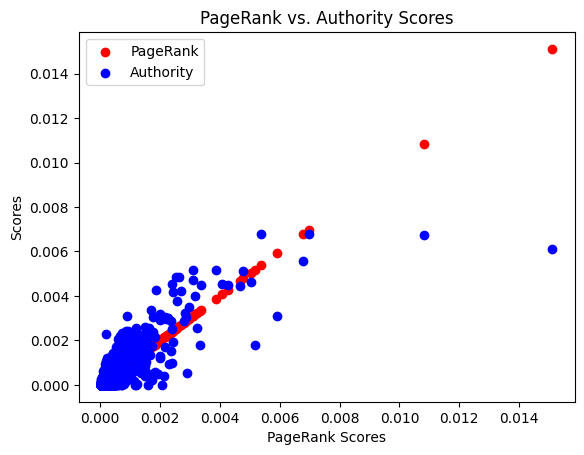

In [46]:
import matplotlib.pyplot as plt

# Plot PageRank scores vs. Authority scores
plt.scatter(pagerank.values(), pagerank.values(), c='red', label='PageRank')
plt.scatter(pagerank.values(), authority.values(), c='blue', label='Authority')
plt.xlabel('PageRank Scores')
plt.ylabel('Scores')
plt.title('PageRank vs. Authority Scores')
plt.legend()

plt.show()


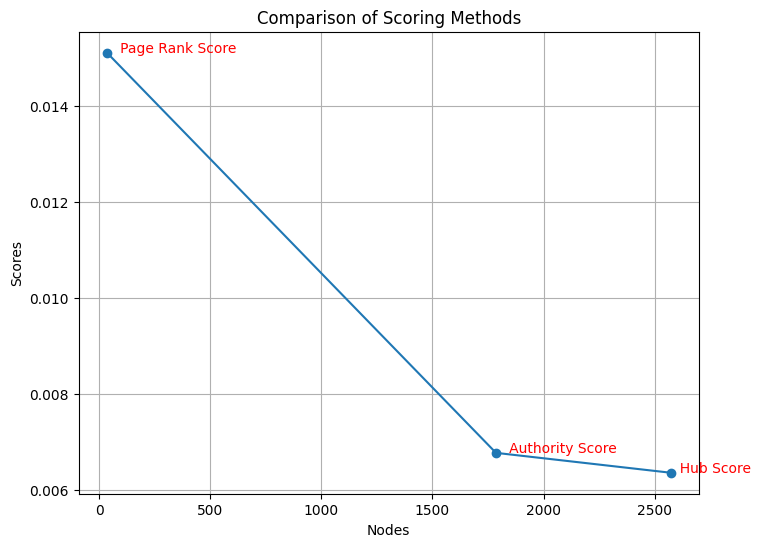

In [47]:
# plotting the comparision plot to show comparision of scores of all the three scoring methods..

# getting the nodes ranked according to their scores.
# Sort the scores in descending order and convert the keys to integers
pgRank_sorted = {int(k): v for k, v in sorted(pagerank.items(), key=lambda item: item[1], reverse=True)}
auth_scores_dict = {i+1: score for i, score in enumerate(auth_scores)}
auth_sorted = {int(k): v for k, v in sorted(auth_scores_dict.items(), key=lambda item: item[1], reverse=True)}
hub_scores_dict = {i+1: score for i, score in enumerate(hub_scores)}
hub_sorted = {int(k): v for k, v in sorted(hub_scores_dict.items(), key=lambda item: item[1], reverse=True)}

# Get the highest ranked node for each method
pgRank_maxKey = list(pgRank_sorted.keys())[0]
auth_maxKey = list(auth_sorted.keys())[0]
hub_maxKey = list(hub_sorted.keys())[0]

# Get the highest score for each method
pgRank_score = pgRank_sorted[pgRank_maxKey]
auth_score = auth_sorted[auth_maxKey]
hub_score = hub_sorted[hub_maxKey]

# Plot the figure using the highest ranked node and highest scores obtained
plt.figure(figsize=(8, 6))
plt.plot([pgRank_maxKey, auth_maxKey, hub_maxKey], [pgRank_score, auth_score, hub_score], marker='o')
plt.text(pgRank_maxKey, pgRank_score, '   Page Rank Score', color="red")
plt.text(auth_maxKey, auth_score, '   Authority Score', color="red")
plt.text(hub_maxKey, hub_score, '  Hub Score', color="red")
plt.xlabel("Nodes")
plt.ylabel("Scores")
plt.title("Comparison of Scoring Methods")
plt.grid(True)
plt.show()
